<a href="https://colab.research.google.com/github/GitMechub/Gears-Spur_Gear_Sizing/blob/main/Spur_Gear_Sizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spur Gear Sizing - v1.0.0**

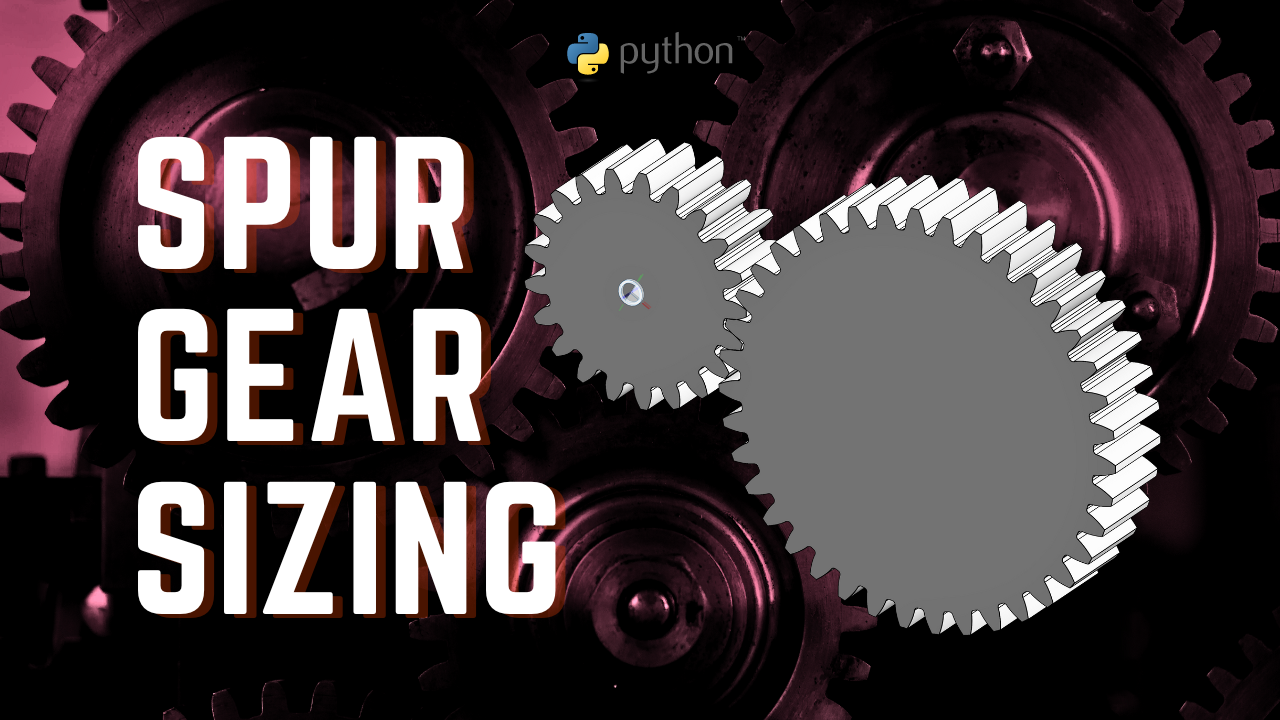

Please, subscribe to the channel [Mechub](https://youtube.com/@Mechub?sub_confirmation=1)
and check my [GitHub](https://github.com/GitMechub)

---

*Por favor, inscreva-se no canal: [Mechub](https://youtube.com/@Mechub?sub_confirmation=1) e visite o meu [GitHub](https://github.com/GitMechub)*


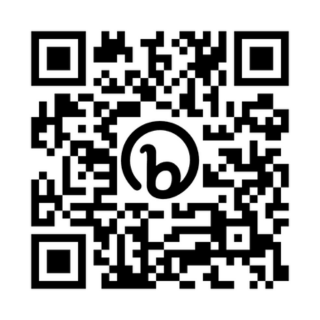

Link for the video explaining **how to use** the code:

---

*Link para o vídeo explicando como usar o código (legendas em potuguês):*

[![YouTube](https://img.shields.io/badge/YouTube-FF0000?style=for-the-badge&logo=youtube&logoColor=white)](https://youtu.be/T1YwprHeOw4)

#Packages

In [1]:
pip install cadquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.7/423.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.2 MB/s eta 0:00:00


In [2]:
pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.3 MB/s eta 0:00:00


In [3]:
import math
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import cadquery as cq
from cadquery import exporters

##Materials

In [4]:
class steel_1020:   # Steel 1020 properties [2]
  def __init__(self):
    self.poisson = 0.29	   # Poisson ratio
    self.E = 186e9  # Modulus of Elasticity (Pa)
    self.Sut = 420e6    # Tensile Strength, Ultimate (Pa)
    self.Sy = 350e6    # Tensile Strength, Yield (Pa)
    self.HB = 121    # Hardness, Brinell (HB)
    self.Sfb = ((167*self.HB) - 274 - (0.152*(self.HB**2)))*6894.75729   # Bending-Fatigue Strength (Pa) [1] for Grade 1, which is considered normal industrial quality [3]
    self.Sfc = ((327*self.HB) + 26000)*6894.75729    # Surface-Fatigue Strength (Pa) [1] for Grade 1, which is considered normal industrial quality [3]

class steel_1045:   # Steel 1045 properties [2]
  def __init__(self):
    self.poisson = 0.29	   # Poisson ratio
    self.E = 206e9  # Modulus of Elasticity (Pa)
    self.Sut = 585e6    # Tensile Strength, Ultimate (Pa)
    self.Sy = 450e6    # Tensile Strength, Yield (Pa)
    self.HB = 163    # Hardness, Brinell (HB)
    self.Sfb = ((167*self.HB) - 274 - (0.152*(self.HB**2)))*6894.75729   # Bending-Fatigue Strength (Pa) [1] for Grade 1, which is considered normal industrial quality [3]
    self.Sfc = ((327*self.HB) + 26000)*6894.75729    # Surface-Fatigue Strength (Pa) [1] for Grade 1, which is considered normal industrial quality [3]

class steel_a4140:   # AISI 4140 Steel, normalized at 870°C (1600°F), air cooled, 25 mm (1 in.) round properties [2]
  def __init__(self):
    self.poisson = 0.29	   # Poisson ratio
    self.E = 205e9  # Modulus of Elasticity (Pa)
    self.Sut = 1020e6    # Tensile Strength, Ultimate (Pa)
    self.Sy = 655e6    # Tensile Strength, Yield (Pa)
    self.HB = 302    # Hardness, Brinell (HB)
    self.Sfb = ((167*self.HB) - 274 - (0.152*(self.HB**2)))*6894.75729   # Bending-Fatigue Strength (Pa) [1] for Grade 1, which is considered normal industrial quality [3]
    self.Sfc = ((327*self.HB) + 26000)*6894.75729    # Surface-Fatigue Strength (Pa) [1] for Grade 1, which is considered normal industrial quality [3]

class steel_a4340:   # AISI 4340 Steel, normalized, 25 mm round properties [2]
  def __init__(self):
    self.poisson = 0.29	   # Poisson ratio
    self.E = 200e9  # Modulus of Elasticity (Pa)
    self.Sut = 1282e6    # Tensile Strength, Ultimate (Pa)
    self.Sy = 862e6    # Tensile Strength, Yield (Pa)
    self.HB = 363    # Hardness, Brinell (HB)
    self.Sfb = ((167*self.HB) - 274 - (0.152*(self.HB**2)))*6894.75729   # Bending-Fatigue Strength (Pa) [1] for Grade 1, which is considered normal industrial quality [3]
    self.Sfc = ((327*self.HB) + 26000)*6894.75729    # Surface-Fatigue Strength (Pa) [1] for Grade 1, which is considered normal industrial quality [3]

class al_bronze:   # Aluminum Bronze, UNS C95400 properties [2]
  def __init__(self):
    self.poisson = 0.316	   # Poisson ratio
    self.E = 110e9  # Modulus of Elasticity (Pa)
    self.Sut = 515e6    # Tensile Strength, Ultimate (Pa)
    self.Sy = 205e6    # Tensile Strength, Yield (Pa)
    self.HB = 170    # Hardness, Brinell (HB)
    self.Sfb = 160e6    # Bending-Fatigue Strength (Pa) [1]
    self.Sfc = 450e6    # Surface-Fatigue Strength (Pa) [1]

In [5]:
def customoption():
  # Pressure angle options
  while True:
      options = [20, 25]
      print("* SELECT THE PRESSURE ANGLE:\n")
      for i in range(len(options)):
          print(f"[ {i + 1} ] {options[i]}")
      try:
          pangle_choice = int(input("\nEnter the number of your choice: ")) - 1
          if 0 <= pangle_choice < len(options):
              pangle = options[pangle_choice]
              print('\n---\n')
              print('-> ', pangle, '\n\n---\n\n')
              break
          else:
              print("\n*** Invalid choice. Please select a valid option. ***\n")
      except ValueError:
          print("\n*** Invalid input. Please enter the number of your choice. ***\n")

  # Material options
  while True:
      options = ['Steel 1020', 'Steel 1045', 'AISI 4140 Steel', 'AISI 4340 Steel', 'Aluminum Bronze']
      print("* SELECT THE GEAR MATERIAL:\n")
      for i in range(len(options)):
          print(f"[ {i + 1} ] {options[i]}")
      try:
          materialsel_choice = int(input("\nEnter the number of your choice: ")) - 1
          if 0 <= materialsel_choice < len(options):
              materialsel = options[materialsel_choice]
              print('\n---\n')
              print('-> ', materialsel, '\n\n---\n\n')
              materialsel = steel_1020() if materialsel == 'Steel 1020' else steel_1045() if materialsel == 'Steel 1045' else steel_a4140() if materialsel == 'AISI 4140 Steel' else steel_a4340() if materialsel == 'AISI 4340 Steel' else al_bronze()
              break
          else:
              print("\n*** Invalid choice. Please select a valid option. ***\n")
      except ValueError:
          print("\n*** Invalid input. Please enter the number of your choice. ***\n")

  return pangle, materialsel


##Diametral Pitch

In [6]:
class pdover20:   # AGMA Full-Depth Gear Tooth Specifications [1]
  def __init__(self, pd):
    self.a = (1.000/pd)*25.4   # Addedum (mm)
    self.b = (1.250/pd)*25.4   # Dedendum (mm)
    self.wd = ((2.2/pd) + 0.002)*25.4    # Whole depth (mm)

class pdlower20:   # AGMA Full-Depth Gear Tooth Specifications [1]
  def __init__(self, pd):
    self.a = (1.000/pd)*25.4   # Addedum (mm)
    self.b = (1.250/pd)*25.4   # Dedendum (mm)
    self.wd = (2.25/pd)*25.4    # Whole depth (mm)

## Bending Stress

In [7]:

# AGMA bending stress equation:

##  Geometry factor (J) for HPSTC [1]
def J_calculation(gears, gear_index, ang_pres):

  ### Determining the pinion and gear index
  if gear_index == 0:
    keys = list(gears.keys())[0:gear_index+2]
    gears_ = {key: gears[key] for key in keys}
  else:
    keys = list(gears.keys())[gear_index-1:gear_index+2]
    gears_ = {key: gears[key] for key in keys}

  index_gear = max(gears_.keys(), key=lambda gear: gears_[gear]['Radius'])    # Index for max radius
  if index_gear == gear_index:    # If gear index is equal to the index for maximum radius
    index_pinion = index_gear-1
  else:   # Else (index for max radius is the gear's index while "gear_index" corresponds to the pinion's)
    index_pinion = gear_index
    index_gear = gear_index+1
  ###

  Ng = gears[index_gear]['Number of teeth']   # Gear's number of teeth

  if ang_pres == 20:
    if gear_index == index_pinion:   # If pinion
      if 21 < Ng <= 26:
        J = 0.33
      elif 26 <= Ng <= 35:
        J = 0.33 + (0.34 - 0.33) * (Ng - 26) / (35 - 26)
      elif 35 <= Ng <= 55:
        J = 0.34
      elif 55 <= Ng <= 135:
        J = 0.34 + (0.35 - 0.34) * (Ng - 55) / (135 - 55)
      else:
        J = 0.010819051538861806 * np.log10(Ng) + 0.2973840363302308    # Log curve fitting
    else:   # If gear
      if 21 <= Ng <= 26:
        J = 0.33 + (0.35 - 0.33) * (Ng - 21) / (26 - 21)
      elif 26 <= Ng <= 35:
        J = 0.35 + (0.37 - 0.35) * (Ng - 26) / (35 - 26)
      elif 35 <= Ng <= 55:
        J = 0.37 + (0.40 - 0.37) * (Ng - 35) / (55 - 35)
      elif 55 <= Ng <= 135:
        J = 0.40 + (0.43 - 0.40) * (Ng - 55) / (135 - 55)
      else:
        J = 0.052778512329668986 * np.log10(Ng) + 0.1778633951854412    # Log curve fitting

  if ang_pres == 25:
    if gear_index == index_pinion:   # If pinion
      if 14 <= Ng <= 26:
        J = 0.33
      elif 26 <= Ng <= 35:
        J = 0.33 + (0.34 - 0.33) * (Ng - 26) / (35 - 26)
      elif 35 <= Ng <= 55:
        J = 0.34
      elif 55 <= Ng <= 135:
        J = 0.34 + (0.35 - 0.34) * (Ng - 55) / (135 - 55)
      else:
        J = 0.010819051538861806 * np.log10(Ng) + 0.2973840363302308    # Log curve fitting
    else:   # If gear
      if 14 < Ng <= 17:
        J = 0.33 + (0.36 - 0.33) * (Ng - 14) / (17 - 14)
      if 17 <= Ng <= 21:
        J = 0.36 + (0.39 - 0.36) * (Ng - 17) / (21 - 17)
      if 21 <= Ng <= 26:
        J = 0.39 + (0.41 - 0.39) * (Ng - 21) / (26 - 21)
      elif 26 <= Ng <= 35:
        J = 0.41 + (0.44 - 0.41) * (Ng - 26) / (35 - 26)
      elif 35 <= Ng <= 55:
        J = 0.44 + (0.47 - 0.44) * (Ng - 35) / (55 - 35)
      elif 55 <= Ng <= 135:
        J = 0.47 + (0.51 - 0.47) * (Ng - 55) / (135 - 55)
      else:
        J = 0.07761075494179535 * np.log10(Ng) + 0.14692777789409495    # Log curve fitting

  return J



##  K for bending stress calculation [1]:
def K_bending(radius, vel, d_shaft, root_radius, whole_depth, face_width, is_idler=0):

  warning = np.nan

  ### Ka, Ks, KI:
  Ka = 1    # 1 for Electric motors (DEFAULT); 1.25 for Multicylinder engine; 1.5 for Single-cylinder engine
  Ks = 1
  if is_idler == 0:
    KI = 1    # 1 for a nonidler gear (DEFAULT); 1.42 for an idler gear
  else:
    KI = 1.42

  ### KB:
  mb = (root_radius-(d_shaft/2))/whole_depth    # Backup ratio
  if mb >= 0.5 and mb <= 1.2:
    KB = -2*mb+3.4
  elif mb < 0.5:
    KB = 3.4
    print(f"Backup ratio below 0.5 - not recommended [1]: {mb}")
    warning = f"Backup ratio below 0.5 - not recommended [1]: {mb}"
  else:
    KB = 1

  ### Kv:
  Vt = vel*(radius/1000)   # Angular velocity in rad/s and Radius in mm
  B = ((12 - 6)**(2/3))/4   # Quality index Qv equal to 6
  A = 50 + 56*(1-B)
  Kv = (A/(A+((200*Vt)**0.5)))**B

  ### Km:
  if face_width < 50:
    Km = 1.6
  elif face_width <= 150:
    Km = 1.7
  elif face_width <= 250:
    Km = 1.8
  elif face_width < 500:
    Km = 1.9
  elif face_width >= 500:
    Km = 2

  return Ka, Ks, KI, KB, Kv, Km, warning


## Surface Stress

In [8]:
# AGMA surface stress equation:

##  Surface geomery factor (I) [1]
def I_calculation(gears, gear_index, ang_pres, pd, C):

  ### Determining the pinion and gear index
  if gear_index == 0:
    keys = list(gears.keys())[0:gear_index+2]
    gears_ = {key: gears[key] for key in keys}
  else:
    keys = list(gears.keys())[gear_index-1:gear_index+2]
    gears_ = {key: gears[key] for key in keys}

  index_gear = max(gears_.keys(), key=lambda gear: gears_[gear]['Radius'])    # Index for max radius
  if index_gear == gear_index:    # If gear index is equal to the index for maximum radius
    index_pinion = index_gear-1
    print(index_gear, index_pinion, 'gear, pinion')
  else:   # Else (index for max radius is the gear's index while "gear_index" corresponds to the pinion's)
    index_pinion = gear_index
    index_gear = gear_index+1
    print(index_gear, index_pinion, 'gear, pinion')
  ###

  rp = gears[index_pinion]['Radius']/25.4   # Pinion radius (in)

  rho_p = ((((rp+(1/pd))**2)-((rp*math.cos(math.radians(ang_pres)))**2))**0.5)-((math.pi/pd)*(math.cos(math.radians(ang_pres))))
  rho_g = (C/25.4)*math.cos(math.radians(ang_pres))-rho_p

  I = math.cos(math.radians(ang_pres))/(((1/rho_p)-(1/rho_g))*rp*2)   # Dimensionless

  return I


##  Elastic Coefficient [1]
def Cp_calculation(poisson, E):

  Cp = (1/(2*math.pi*((1-(poisson**2))/(E))))**0.5    # Elastic Coefficient (Pa**0.5)

  return Cp

## Bending-Fatigue Strength

In [9]:
##  Elastic Coefficient [1]
def KL_calculation(HB, N_cyc):

  if N_cyc >= 1e7:
    KL = 1.3558*(N_cyc**(-0.0178))

  elif HB <= 160:
    KL = 2.3194*(N_cyc**(-0.0538))

  elif HB > 160 and HB <= 250:
    KL = ((((4.9404*(N_cyc**(-0.01045))) - (2.3194*(N_cyc**(-0.0538))))*(HB-160))/90) + (2.3194*(N_cyc**(-0.0538)))

  elif HB > 250 and HB <= 400:
    KL = ((((9.4518*(N_cyc**(-0.148))) - (4.9404*(N_cyc**(-0.01045))))*(HB-250))/150) + (4.9404*(N_cyc**(-0.01045)))

  else:
    KL = (4.9404*(N_cyc**(-0.01045)))

  return KL

## Surface-Fatigue Strength

In [10]:
##  Elastic Coefficient [1]
def CL_calculation(HB, N_cyc):

  if N_cyc >= 1e7:
    CL = 1.4488*(N_cyc**(-0.023))

  else:
    CL = 2.466*(N_cyc**(-0.056))

  return CL

# Input

To run: **Ctrl+F9** (Google Colab)

In [22]:

# Setup

T_mot = 6   # Motor torque N.m
T_req = 18    # Required torque N.m

C = 100   # Distance between centers mm (first and last shaft)
vel = 70    # Motor's angular velocity rpm

N_cyc = 1e7   # Number of cycles (rpm x 60 x hours per year x years) - DEFAULT = 1e7
Ns_lim = 1.5    # Ideal safety factor - DEFAULT = 1.5

## Selection:

ang_pres, gear_material = customoption()

###


* SELECT THE PRESSURE ANGLE:

[ 1 ] 20
[ 2 ] 25

Enter the number of your choice: 1

---

->  20 

---


* SELECT THE GEAR MATERIAL:

[ 1 ] Steel 1020
[ 2 ] Steel 1045
[ 3 ] AISI 4140 Steel
[ 4 ] AISI 4340 Steel
[ 5 ] Aluminum Bronze

Enter the number of your choice: 1

---

->  Steel 1020 

---




# Code

## Sizing

In [23]:

def divisors(number):
  divisors = []
  i = 1
  while i < number+1:
      if number % i == 0:
          divisors.append(i)
      i += 1
  return divisors


def find_optimal_divisors(T_req, T_mot, div_number, root_number):

  mg_total = T_req/T_mot if T_req>T_mot else T_mot/T_req

  divisor_list = divisors(mg_total)  # All divisors for the number specified

  print("The divisors of {} : {}".format(mg_total, divisor_list))


  # Divisor method

  while 1:
    div_combinations = combinations_with_replacement(divisor_list, div_number)  # Divisors combinations for which the product is equal to the specified number
    combs_div = []
    for item in div_combinations:
      if any(x == 1 for x in item) or any(x > 10 for x in item):    # If combination has 1 or any of them is over 10 (not recommended [1])
        continue

      if math.prod(item) == mg_total:
        combs_div.append(list(item))

    if len(combs_div)>0 or div_number > 10:    # If a combination has been founded or If not founded and divisor combination length is more than 10
      break
    else:
      div_number += 1

  ##  Selecting the combination with the lowest standard deviation

  combs_div_std_min = 1e6
  for i in range(len(combs_div)):
    combs_div_std = np.std(combs_div[i])
    if combs_div_std < combs_div_std_min or combs_div_std_min == 0:
      combs_div_std_min = combs_div_std
      combs_div_std_min_i = i

  try:
    mg_list_div = combs_div[combs_div_std_min_i]
  except:
    mg_list_div = []

  ###


  # Root method

  while 1:
    mg_list_root = [mg_total**(1/root_number)]*root_number
    if any(x > 10 for x in mg_list_root):
      root_number += 1
      continue
    else:
      break

  if len(mg_list_root) < len(mg_list_div) or len(mg_list_div) <= 0:
    mg_list = mg_list_root
  else:
    mg_list = mg_list_div

  print("The divisors of {} : {}".format(mg_total, mg_list))

  #

  return mg_list, mg_total, div_number, root_number


In [24]:
# GEARS DIMENSIONS #

def compound_train(mg_list, mg_total, T_mot, T_req, C, vel, N_cyc, Ns_lim, ang_pres, gear_material):

  warnings = []

  n_gears_compound = len(mg_list) + 2   # Number of gears compound train

  gears_comp = {}


  # Compound train:

  k = 0
  for i in range(len(mg_list)):

    if T_mot < T_req:   # Determining if it is required a reduction of an increase in velocity
      Tp = T_mot
      Tg = T_req
      print("Reduction in velocity")
      isreducer = True
    else:
      Tp = T_req
      Tg = T_mot
      isreducer = False

    Np = 21 if ang_pres == 20 else 14  # Minium number of teeth equal to 18 (21 for the min J) for 20°, 12 (14 for the min J) for 25° [1]

    soma_comb_mg = len(mg_list)
    for j in range(len(mg_list)):
      soma_comb_mg = soma_comb_mg + mg_list[j] # n + mg1 + mg2 + mg3 + ... + mgn

    rp = C/soma_comb_mg  # Considering C as the distance available between the motor and the last gear

    if i == 0:
      velp = vel*(2*math.pi/60)   # Velocity to rad/s
    else:
      velp = gears_comp[k-1]['Angular velocity']

    pd = Np/(rp*2/(25.4))   # Diametral Pitch
    m = 25.4/pd   # Module (mm)
    pc = math.pi/pd
    pb = pc*math.cos(math.radians(ang_pres))

    mg = mg_list[i]
    mv = 1/mg

    if pd>=20:
      pd_esp = pdover20(pd)
    else:
      pd_esp = pdlower20(pd)


    gears_comp[k] = {

    'Addendum': pd_esp.a,
    'Dedendum': pd_esp.b,
    'Whole depth': pd_esp.wd,
    'Number of teeth': Np,
    'Radius': rp,   # Pitch radius (mm)
    'Root Radius': rp-pd_esp.b,
    'Face width': (12/pd)*25.4,   # Face width (mm) [1]

    'Torque': Tp,    # Pinion's Torque (N.m)
    'Angular velocity': velp,    # Angulas velocity (rad/s)

    'mg': mg,
    'pd': pd,
    'm': m,
    'pc': pc,
    'pb': pb,
    'mv': mv

    }


    rg = gears_comp[k]['Radius']*mg
    Tg = mg*gears_comp[k]['Torque']
    velg = gears_comp[k]['Angular velocity']/mg
    Ng = round((gears_comp[k]['Number of teeth']/gears_comp[k]['Torque'])*Tg)

    C_ = gears_comp[k]['Radius']+rg   # Distance available between gears


    gears_comp[k+1] = {

    'Addendum': pd_esp.a,
    'Dedendum': pd_esp.b,
    'Whole depth': pd_esp.wd,
    'Number of teeth': Ng,
    'Radius': rg,   # Pitch radius (mm)
    'Root Radius': rg-pd_esp.b,
    'Face width': (12/pd)*25.4,   # Face width (mm) [1]

    'Torque': Tg,    # Gear's Torque (N.m)
    'Angular velocity': velg,    # Angulas velocity (rad/s)

    'mg': mg,
    'pd': pd,
    'm': m,
    'pc': pc,
    'pb': pb,
    'mv': mv

    }

    Z = ((((gears_comp[k]['Addendum']+gears_comp[k]['Radius'])**2) - ((gears_comp[k]['Radius']*math.cos(math.radians(ang_pres)))**2))**(0.5)) + ((((gears_comp[k+1]['Addendum']+gears_comp[k+1]['Radius'])**2) - ((gears_comp[k+1]['Radius']*math.cos(math.radians(ang_pres)))**2))**(0.5)) - C_*math.sin(math.radians(ang_pres))   # Lenght of action
    mp = (Z/25.4)/pb    # Contact ratio - acceptable range (mp > 1)

    gears_comp[k]['Z'] = Z
    gears_comp[k]['mp'] = mp
    gears_comp[k]['C_'] = C_
    gears_comp[k+1]['Z'] = Z
    gears_comp[k+1]['mp'] = mp
    gears_comp[k+1]['C_'] = C_

    if mp >= 1.4:
      print(f'Contact {i+1}: Contact Ratio within the recommended range (mp >= 1.4): {mp}')
    elif mp > 1:
      print(f'Contact {i+1}: Contact Ratio within the acceptable range (mp > 1): {mp}')
    else:
      print(f'Contact {i+1}: Contact Ratio out of the recommended range (mp <= 1 or mp > 2): {mp}')


    k = k + 2

  #


  # GEARS SAFETY FACTOR #

  Fw_ = 8
  while Fw_ <= 16:    # Face width (mm) Between 8/pd and 16/pd according to [1]
    for gear in gears_comp:

      # Determining the pinion and gear index

      if gear == 0:
        keys = list(gears_comp.keys())[0:gear+2]
        gears_ = {key: gears_comp[key] for key in keys}
      else:
        keys = list(gears_comp.keys())[gear-1:gear+2]
        gears_ = {key: gears_comp[key] for key in keys}

      index_gear = max(gears_.keys(), key=lambda gear: gears_[gear]['Radius'])    # Index for max radius
      if index_gear == gear:    # If gear index is equal to the index for maximum radius
        index_pinion = index_gear-1
        gear_type = 'Gear'
      else:   # Else (index for max radius is the gear's index while "gear_index"("gear") corresponds to the pinion's)
        index_pinion = gear
        index_gear = gear+1
        gear_type = 'Pinion'

      # Is an idler?

      is_idler = 0
      if gear > 0 and gear+1 < len(gears_comp):
        if gears_comp[gear]['Radius'] > gears_comp[gear-1]['Radius'] and gears_comp[gear+1]['Radius'] > gears_comp[gear]['Radius']:
          is_idler = 1
          gear_type = 'Idler'

      gears_comp[gear]['Gear type'] = gear_type


      # Tangential load component (N) * Identify the pinion

      Wt = Tp/(gears_comp[index_pinion]['Radius']*1e-3)


      # Contect ratio and length of action

      Z = ((((gears_comp[index_pinion]['Addendum']+gears_comp[index_pinion]['Radius'])**2) - ((gears_comp[index_pinion]['Radius']*math.cos(math.radians(ang_pres)))**2))**(0.5)) + ((((gears_comp[index_gear]['Addendum']+gears_comp[index_gear]['Radius'])**2) - ((gears_comp[index_gear]['Radius']*math.cos(math.radians(ang_pres)))**2))**(0.5)) - gears_comp[gear]['C_']*math.sin(math.radians(ang_pres))   # Lenght of action
      mp = (Z/25.4)/pb    # Contact ratio

      if mp >= 1.4:
        print(f'Contact Ratio within the recommended range (mp >= 1.4): {mp}')
      elif mp > 1:
        print(f'Contact Ratio within the acceptable range (mp > 1): {mp}')
        warnings.append(f'Contact Ratio within the acceptable range (mp > 1): {mp}')
      else:
        print(f'Contact Ratio out of the recommended range (mp <= 1 or mp > 2): {mp}')
        warnings.append(f'Contact Ratio out of the recommended range (mp <= 1 or mp > 2): {mp}')


      # Face width value

      Fw = (Fw_/pd)*25.4   # Face width (mm) Between 8/pd and 16/pd according to [1] / To calculate below based on a safety factor of 1.5
      print('Face width =',Fw)

      for key in gears_comp:
        gears_comp[key]['Face width'] = Fw


      # Bending Stress

      gears_comp[gear]['J'] = J_calculation(gears_comp, gear, ang_pres)
      gears_comp[gear]['Ka'], gears_comp[gear]['Ks'], gears_comp[gear]['KI'], gears_comp[gear]['KB'], gears_comp[gear]['Kv'], gears_comp[gear]['Km'], warning = K_bending(gears_comp[gear]['Radius'], gears_comp[gear]['Angular velocity'], gears_comp[gear]['C_']/2, gears_comp[gear]['Root Radius'], gears_comp[gear]['Whole depth'], gears_comp[gear]['Face width'], is_idler)
      #gears[gear]['Face width'] = (12/pd)*25.4
      gears_comp[gear]['sigma_b'] = (Wt/(m*1e-3*gears_comp[gear]['Face width']*1e-3*gears_comp[gear]['J']))*(gears_comp[gear]['Ka']*gears_comp[gear]['Km']*gears_comp[gear]['Ks']*gears_comp[gear]['KB']*gears_comp[gear]['KI'])/gears_comp[gear]['Kv']

      warnings.append(warning)

      # Surface Stress

      gears_comp[gear]['I'] = I_calculation(gears_comp, gear, ang_pres, pd, gears_comp[gear]['C_'])
      gears_comp[gear]['Cp'] = Cp_calculation(gear_material.poisson, gear_material.E)
      gears_comp[gear]['sigma_c'] = gears_comp[gear]['Cp']*(((Wt/(2*gears_comp[gear]['Radius']*1e-3*gears_comp[gear]['Face width']*1e-3*gears_comp[gear]['I']))*(gears_comp[gear]['Ka']*gears_comp[gear]['Km']*gears_comp[gear]['Ks']*gears_comp[gear]['KI'])/gears_comp[gear]['Kv'])**0.5)


      # Bending-Fatigue Strength and Safety Factor

      gears_comp[gear]['sigma_fb'] = KL_calculation(gear_material.HB, N_cyc)*gear_material.Sfb
      gears_comp[gear]['N_b'] = gears_comp[gear]['sigma_fb']/gears_comp[gear]['sigma_b']


      # Surface-Fatigue Strength and Safety Factor

      gears_comp[gear]['sigma_fc'] = CL_calculation(gear_material.HB, N_cyc)*gear_material.Sfc
      gears_comp[gear]['N_c'] = (gears_comp[gear]['sigma_fc']/gears_comp[gear]['sigma_c'])**2

      print(gear, gear_type,'| Safety Factors = ',gears_comp[gear]['N_c'], gears_comp[gear]['N_b'])

      print('---')


    min_N = min(min(gear_data['N_c'] for gear_data in gears_comp.values()),min(gear_data['N_b'] for gear_data in gears_comp.values()))

    if round(min(gear_data['N_c'] for gear_data in gears_comp.values()),1) >= Ns_lim and round(min(gear_data['N_b'] for gear_data in gears_comp.values()),1) >= Ns_lim:
      break
    else:
      Fw_ += 1

  print('\n\nMinimal Safety Factor = ',min_N,'\n')

  train_type = 'Compound'
  if train_type.upper() != 'SIMPLE':
    if isreducer is True:
      gears = gears_comp
    else:
      gears = {i: gears_comp[gear] for i, gear in enumerate(reversed(gears_comp))}
      for gear in gears:
        gears[gear]['Gear type'] = 'Gear' if gears[gear]['Gear type'] == 'Pinion' else 'Pinion' if gears[gear]['Gear type'] == 'Gear' else gears[gear]['Gear type']

  return gears_comp, gears, isreducer, min_N, warnings

  #


In [25]:
div_number = 1    # Initial divisor combination length for divisor method
root_number = 1    # Initial divisor combination length for root method
error = 0

while True:

  update_loop = False

  mg_list, mg_total, div_number, root_number  = find_optimal_divisors(T_req, T_mot, div_number, root_number)

  gears_comp, gears, isreducer, min_N, warnings = compound_train(mg_list, mg_total, T_mot, T_req, C, vel, N_cyc, Ns_lim, ang_pres, gear_material)

  print('\n---\n')

  for gear in range(len(gears)):

    dp = gears[gear]['Radius']*2    # Pitch circle diameter (mm)
    db = dp*math.cos(math.radians(ang_pres))    # Base circle diameter (mm)
    rb = db/2   # Base circle diameter (mm)

    if rb < gears[gear]['Root Radius']:
      update_loop = True
      break

  if update_loop == True:
    root_number += 1
    div_number += 1
    root_number_ = root_number # Checkpoint
    div_number_ = div_number # Checkpoint
  else:
    break

  if root_number > 20:
    error = 1
    warnings.append('The maximum number of gears has been reached. Please consider changing the setup.')
    break


while True:

  mg_list, mg_total, div_number, root_number  = find_optimal_divisors(T_req, T_mot, div_number, root_number)

  gears_comp, gears, isreducer, min_N, warnings = compound_train(mg_list, mg_total, T_mot, T_req, C, vel, N_cyc, Ns_lim, ang_pres, gear_material)

  print('\n---\n')

  if round(min_N,1) < Ns_lim:
    root_number += 1
    div_number += 1
    print(min_N, 'min_N')
  else:
    break

  if root_number > 10:
      root_number = root_number_
      div_number = div_number_
      C = C*1.5

      mg_list, mg_total, div_number, root_number  = find_optimal_divisors(T_req, T_mot, div_number, root_number)

      gears_comp, gears, isreducer, min_N, warnings = compound_train(mg_list, mg_total, T_mot, T_req, C, vel, N_cyc, Ns_lim, ang_pres, gear_material)

      print(f"\n---\nThe center distance has been increased to {C} because the safety factor is below the recommended level. Please consider changing the material.")

      warnings.append(f'The center distance has been increased to {C} because the safety factor is below the recommended level. Please consider changing the material.')

      #break


if error == 1:
  print("\n---\nERROR")


# Warnings
try:
  warnings = np.array(warnings)
  warnings = warnings[~np.isnan(warnings)]

  warnings_df = pd.DataFrame({'WARNINGS:': list(warnings)})
except:
  warnings_df = pd.DataFrame({'WARNINGS:': np.nan})
#


The divisors of 3.0 : [1, 3]
The divisors of 3.0 : [3]
Reduction in velocity
Contact 1: Contact Ratio within the recommended range (mp >= 1.4): 1.6806726069288718
Contact Ratio within the recommended range (mp >= 1.4): 1.6806726069288718
Face width = 19.047619047619047
Backup ratio below 0.5 - not recommended [1]: -0.5555555555555552
1 0 gear, pinion
0 Pinion | Safety Factors =  2.08374428575325 1.359007536752707
---
Contact Ratio within the recommended range (mp >= 1.4): 1.6806726069288718
Face width = 19.047619047619047
1 0 gear, pinion
1 Gear | Safety Factors =  6.25123285725975 5.460739374951786
---
Contact Ratio within the recommended range (mp >= 1.4): 1.6806726069288718
Face width = 21.428571428571427
Backup ratio below 0.5 - not recommended [1]: -0.5555555555555552
1 0 gear, pinion
0 Pinion | Safety Factors =  2.3442123214724067 1.5288834788467953
---
Contact Ratio within the recommended range (mp >= 1.4): 1.6806726069288718
Face width = 21.428571428571427
1 0 gear, pinion
1 Ge

## Charts

In [26]:
import pandas as pd
# Create the gear_data dictionary
gear_data = {}
for gear in range(len(gears)):
    gear_data[gear] = {}
    gear_data[gear]['Safety Factor for Bending Failure'] = round(gears[gear]['N_b'], 3)
    gear_data[gear]['Safety Factor for Surface Failure'] = round(gears[gear]['N_c'], 3)
    gear_data[gear]['Bending Stress (MPa)'] = round(gears[gear]['sigma_b'] / 1e6, 3)
    gear_data[gear]['Bending-Fatigue Strength (MPa)'] = round(gears[gear]['sigma_fb'] / 1e6, 3)
    gear_data[gear]['Surface Stress (MPa)'] = round(gears[gear]['sigma_c'] / 1e6, 3)
    gear_data[gear]['Surface-Fatigue Strength (MPa)'] = round(gears[gear]['sigma_fc'] / 1e6, 3)
    gear_data[gear]['Addendum (mm)'] = round(gears[gear]['Addendum'], 3)
    gear_data[gear]['Dedendum (mm)'] = round(gears[gear]['Dedendum'], 3)
    gear_data[gear]['Whole depth (mm)'] = round(gears[gear]['Whole depth'], 3)
    gear_data[gear]['Number of teeth'] = gears[gear]['Number of teeth']
    gear_data[gear]['Pitch Radius (mm)'] = round(gears[gear]['Radius'], 3)
    gear_data[gear]['Root Radius (mm)'] = round(gears[gear]['Root Radius'], 3)
    gear_data[gear]['Face width (mm)'] = round(gears[gear]['Face width'], 3)
    gear_data[gear]['Diametral pitch (1/in)'] = round(gears[gear]['pd'], 3)
    gear_data[gear]['Module (mm)'] = round(gears[gear]['m'], 3)
    gear_data[gear]['Gear ratio'] = round(gears[gear]['mg'], 3)
    gear_data[gear]['Contact ratio'] = round(gears[gear]['mp'], 3)
    gear_data[gear]['Center distance (mm)'] = round(gears[gear]['C_'], 3)

# Convert dictionary to DataFrame
gears_df = pd.DataFrame.from_dict(gear_data, orient='index')

# Transpose the DataFrame
gears_df = gears_df.transpose()

# Display the transposed DataFrame
gears_df


,0,1,2,3
Safety Factor for Bending Failure,2.060,3.494,2.093,3.551
Safety Factor for Surface Failure,1.516,2.626,1.540,2.668
Bending Stress (MPa),60.317,35.556,59.362,34.993
Bending-Fatigue Strength (MPa),124.243,124.243,124.243,124.243
Surface Stress (MPa),367.163,278.984,364.244,276.766
Surface-Fatigue Strength (MPa),452.077,452.077,452.077,452.077
Addendum (mm),1.743,1.743,1.743,1.743
Dedendum (mm),2.179,2.179,2.179,2.179
Whole depth (mm),3.922,3.922,3.922,3.922
Number of teeth,21.000,36.000,21.000,36.000


In [27]:

rectangles = []
h_ = 0
w_ = 0

# Creating rectangles for each gear

for gear in range(len(gears)):
  if gear == 0:
      rectangles.append({'x': 0, 'y': 0, 'width': 2*gears[gear]['Radius'], 'height': gears[gear]['Face width']})
  elif gears[gear]['Gear type'] != 'Pinion':
      previous_rect = rectangles[gear - 1]
      new_x = previous_rect['x'] + previous_rect['width']
      rectangles.append({'x': new_x, 'y': previous_rect['y'], 'width': 2*gears[gear]['Radius'], 'height': gears[gear]['Face width']})
  elif gears[gear]['Gear type'] == 'Pinion':
      previous_rect = rectangles[gear - 1]
      new_y = previous_rect['y'] + previous_rect['height']*2
      new_x = previous_rect['width']/2 - gears[gear]['Radius'] + previous_rect['x']
      rectangles.append({'x': new_x, 'y': new_y, 'width': 2*gears[gear]['Radius'], 'height': gears[gear]['Face width']})

  h_ = rectangles[gear]['height'] + h_
  w_ = rectangles[gear]['width'] + w_

#


# Adding mutiple rectangles to a chart

def plot_rectangles_with_center_lines(rectangles, h_):

  fig, ax = plt.subplots()

  colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

  for idx, rect in enumerate(rectangles):

    color = colors[idx % len(colors)]  # Selecting a color from the list
    r = patches.Rectangle((rect['x'], rect['y']), rect['width'], rect['height'], linewidth=2, edgecolor=color, facecolor=color)
    ax.add_patch(r)

    ## Calculating the center coordinates of the rectangle

    center_x = rect['x'] + rect['width'] / 2
    center_y = rect['y'] + rect['height'] / 2

    ## Adding a center line for each gear

    ax.plot([center_x, center_x], [0, h_], color='black', linestyle='-.')
    text = ax.text(center_x, center_y, 'Gear ' + str(idx), horizontalalignment='center', verticalalignment='center', color='white')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

  plt.axis('equal')

  plt.show()

###


In [28]:
# Plot of gear profiles

_linespace_ = 50

gear_coord = {}

for gear in range(len(gears)):

  dp = gears[gear]['Radius']*2    # Pitch circle diameter (mm)

  db = dp*math.cos(math.radians(ang_pres))    # Base circle diameter (mm)
  rb = db/2   # Base circle diameter (mm)

  radd = gears[gear]['Radius'] + gears[gear]['Addendum']

  rded = gears[gear]['Radius'] - gears[gear]['Dedendum']

  alpha = (((dp**2-db**2)**(0.5))/db)*180/math.pi - ang_pres

  beta = (360/(4*gears[gear]['Number of teeth'])-alpha)*2


  ## Involute offset

  t_ = (360 / (4 * gears[gear]['Number of teeth']) + alpha) * 2


  ## Coordinates lists

  x1 = []
  y1 = []
  x2 = []
  y2 = []

  arc_x_root = []
  arc_y_root = []
  line_x_root_A = []
  line_y_root_A = []
  line_x_root_B = []
  line_y_root_B = []

  arc_x_tip = []
  arc_y_tip = []

  gear_coord[gear] = {'x': [], 'y': []}


  ## Defining a limit for t (addendum circle)

  t_offset = 0
  t = 0
  error_limit = 0.00001
  while True:
      x = rb * (np.cos(np.radians(t + t_offset)) + np.radians(t) * np.sin(np.radians(t + t_offset)))
      y = rb * (np.sin(np.radians(t + t_offset)) - np.radians(t) * np.cos(np.radians(t + t_offset)))

      error = abs((((x**2 + y**2)**0.5) - radd) / radd)

      if error <= error_limit:
          t_limit = t
          break
      else:
          t += 0.01

      if t >= 359:
          error_limit *= 10
          t = 0


  for i in range(gears[gear]['Number of teeth']):

      ## Calculating teeth offset

      t_offset = (360 / (gears[gear]['Number of teeth'])) * i  # Teeth offset

      t = np.linspace(0, t_limit, _linespace_)  # t from 0 to the limit
      ang = np.linspace(0, 360, _linespace_)  # ang from 0 to 360 degrees


      ## Involute equations

      x1.append(rb * (np.cos(np.radians(t + t_offset)) + np.radians(t) * np.sin(np.radians(t + t_offset))))
      y1.append(rb * (np.sin(np.radians(t + t_offset)) - np.radians(t) * np.cos(np.radians(t + t_offset))))

      x2.append(rb * (np.cos(np.radians(-t + t_ + t_offset)) - np.radians(t) * np.sin(np.radians(-t + t_ + t_offset))))
      y2.append(rb * (np.sin(np.radians(-t + t_ + t_offset)) + np.radians(t) * np.cos(np.radians(-t + t_ + t_offset))))


      ## Root connection

      t_offset_next = (360 / (gears[gear]['Number of teeth']))*(i+1) if i < gears[gear]['Number of teeth'] else 0   # 0 offset for the last tooth (the first tooth is the next one)

      x_pointA_base, y_pointA_base = rb * (np.cos(np.radians(0 + t_offset)) + np.radians(0) * np.sin(np.radians(0 + t_offset))),  rb * (np.sin(np.radians(0 + t_offset)) - np.radians(0) * np.cos(np.radians(0 + t_offset)))
      x_pointB_base, y_pointB_base = rb * (np.cos(np.radians(0 + t_ + t_offset)) - np.radians(0) * np.sin(np.radians(0 + t_ + t_offset))),  rb * (np.sin(np.radians(0 + t_ + t_offset)) + np.radians(0) * np.cos(np.radians(0 + t_ + t_offset)))
      x_pointAnext_base, y_pointAnext_base = rb * (np.cos(np.radians(0 + t_offset_next)) + np.radians(0) * np.sin(np.radians(0 + t_offset_next))),  rb * (np.sin(np.radians(0 + t_offset_next)) - np.radians(0) * np.cos(np.radians(0 + t_offset_next)))

      theta_A_root_rad = np.arctan2(y_pointA_base, x_pointA_base)
      theta_B_root_rad = np.arctan2(y_pointB_base, x_pointB_base)
      theta_Anext_root_rad = np.arctan2(y_pointAnext_base, x_pointAnext_base)

      root_radius = gears[gear]['Root Radius']##

      x_pointA_root, y_pointA_root = root_radius*np.cos(theta_A_root_rad), root_radius*np.sin(theta_A_root_rad)
      x_pointB_root, y_pointB_root = root_radius*np.cos(theta_B_root_rad), root_radius*np.sin(theta_B_root_rad)
      x_pointAnext_root, y_pointAnext_root = root_radius*np.cos(theta_Anext_root_rad), root_radius*np.sin(theta_Anext_root_rad)

      if theta_B_root_rad <= theta_Anext_root_rad:
          theta_arc_root = np.linspace(theta_B_root_rad, theta_Anext_root_rad, _linespace_)
      else:
          theta_arc_root = np.linspace(theta_B_root_rad, theta_Anext_root_rad + 2 * np.pi, _linespace_)

      arc_x_root.append(root_radius * np.cos(theta_arc_root))
      arc_y_root.append(root_radius * np.sin(theta_arc_root))

      ### Verify if it's a vertical line (90° or -90°)

      if np.isclose(theta_A_root_rad, np.pi / 2) or np.isclose(theta_A_root_rad, -np.pi / 2):
          # A
          x_A_line_root = np.full(_linespace_, x_pointA_root)
          y_A_line_root = np.linspace(y_pointA_root, y_pointA_base, _linespace_)
      else:
          x_A_line_root = np.linspace(x_pointA_root, x_pointA_base, _linespace_)
          y_A_line_root = y_pointA_root + (x_A_line_root - x_pointA_root) * np.tan(theta_A_root_rad)

      line_x_root_A.append(x_A_line_root)
      line_y_root_A.append(y_A_line_root)

      if np.isclose(theta_B_root_rad, np.pi / 2) or np.isclose(theta_B_root_rad, -np.pi / 2):
          # B
          x_B_line_root = np.full(_linespace_, x_pointB_root)
          y_B_line_root = np.linspace(y_pointB_root, y_pointB_base, _linespace_)
      else:
          x_B_line_root = np.linspace(x_pointB_root, x_pointB_base, _linespace_)
          y_B_line_root = y_pointB_root + (x_B_line_root - x_pointB_root) * np.tan(theta_B_root_rad)

      line_x_root_B.append(x_B_line_root)
      line_y_root_B.append(y_B_line_root)


      ## Tip connection

      x_pointA_tip, y_pointA_tip = rb * (np.cos(np.radians(t_limit + t_offset)) + np.radians(t_limit) * np.sin(np.radians(t_limit + t_offset))),  rb * (np.sin(np.radians(t_limit + t_offset)) - np.radians(t_limit) * np.cos(np.radians(t_limit + t_offset)))
      x_pointB_tip, y_pointB_tip = rb * (np.cos(np.radians(-t_limit + t_ + t_offset)) - np.radians(t_limit) * np.sin(np.radians(-t_limit + t_ + t_offset))),  rb * (np.sin(np.radians(-t_limit + t_ + t_offset)) + np.radians(t_limit) * np.cos(np.radians(-t_limit + t_ + t_offset)))

      theta_A_tip_rad = np.arctan2(y_pointA_tip, x_pointA_tip)
      theta_B_tip_rad = np.arctan2(y_pointB_tip, x_pointB_tip)

      if theta_A_tip_rad <= theta_B_tip_rad:
          theta_arc_tip = np.linspace(theta_A_tip_rad, theta_B_tip_rad, _linespace_)
      else:
          theta_arc_tip = np.linspace(theta_A_tip_rad, theta_B_tip_rad + 2 * np.pi, _linespace_)

      arc_x_tip.append(radd * np.cos(theta_arc_tip))
      arc_y_tip.append(radd * np.sin(theta_arc_tip))

      gear_coord[gear]['x'] = gear_coord[gear]['x'] + list(line_x_root_A[i]) + list(x1[i]) + list(arc_x_tip[i]) + list(reversed(list(x2[i]))) + list(reversed(list(line_x_root_B[i]))) + list(arc_x_root[i])
      gear_coord[gear]['y'] = gear_coord[gear]['y'] + list(line_y_root_A[i]) + list(y1[i]) + list(arc_y_tip[i]) + list(reversed(list(y2[i]))) + list(reversed(list(line_y_root_B[i]))) + list(arc_y_root[i])


  ## Base circle

  circle_x = rb * np.cos(np.radians(ang))
  circle_y = rb * np.sin(np.radians(ang))


  ## Addendum circle

  circle_ax = radd * np.cos(np.radians(ang))
  circle_ay = radd * np.sin(np.radians(ang))

  circle_rx = gears[gear]['Root Radius'] * np.cos(np.radians(ang))
  circle_ry = gears[gear]['Root Radius'] * np.sin(np.radians(ang))


  print(gears[gear]['Root Radius'], rb) # rb
  print(radd - gears[gear]['Root Radius'])

###


# Plot

def plot_gear(gear, gear_coord):

    if gear not in gear_coord:
        print(f"Coordinates for gear {gear} not found in gear_coord.")
        return

    plt.figure(figsize=(10, 10))

    colors = ['r', 'g', 'b', 'c', 'm', 'orange', 'k']
    color = colors[gear % len(colors)]

    plt.plot(gear_coord[gear]['x'], gear_coord[gear]['y'], color=color)

    plt.title('Gear '+str(gear))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.axis('equal')

    plt.show()
#


16.122547547647894 17.19756854782098
3.921700754833271
29.52000716920403 29.787062491474448
3.9217007548332745
16.122547547647894 17.19756854782098
3.921700754833271
29.52000716920403 29.787062491474448
3.9217007548332745


# Gear data and coordinates to xlsx

In [29]:
# Saving a .xlsx file

file_name = 'Gear_data'
excel_writer = pd.ExcelWriter(file_name+'.xlsx', engine='xlsxwriter')

if warnings.size > 0:
  warnings_df.to_excel(excel_writer, sheet_name='WARNINGS', index=False)

gears_df.to_excel(excel_writer, sheet_name='Gear data', index=True)

for gear in range(len(gears)):

    gear_coord_ = pd.DataFrame(gear_coord[gear])
    gear_coord_['x'] = gear_coord_['x'] * 0.001
    gear_coord_['y'] = gear_coord_['y'] * 0.001

    #pd.DataFrame(gear_coord[gear]).to_excel(excel_writer, sheet_name='Gear coord '+str(gear), index=False)

    gear_coord_.to_excel(excel_writer, sheet_name='Gear coord (m) '+str(gear), index=False)

excel_writer.close()

# Output

In [30]:
print('\nGears')
gears_df


Gears


,0,1,2,3
Safety Factor for Bending Failure,2.060,3.494,2.093,3.551
Safety Factor for Surface Failure,1.516,2.626,1.540,2.668
Bending Stress (MPa),60.317,35.556,59.362,34.993
Bending-Fatigue Strength (MPa),124.243,124.243,124.243,124.243
Surface Stress (MPa),367.163,278.984,364.244,276.766
Surface-Fatigue Strength (MPa),452.077,452.077,452.077,452.077
Addendum (mm),1.743,1.743,1.743,1.743
Dedendum (mm),2.179,2.179,2.179,2.179
Whole depth (mm),3.922,3.922,3.922,3.922
Number of teeth,21.000,36.000,21.000,36.000


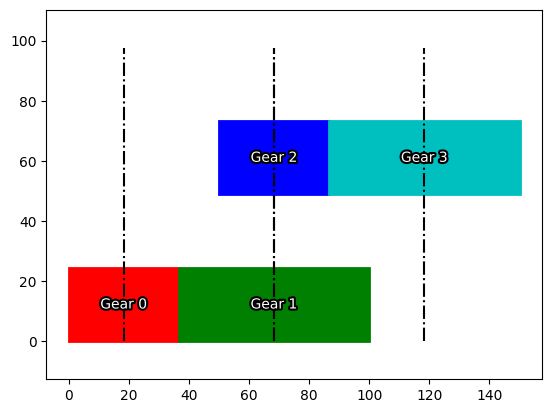

In [31]:
plot_rectangles_with_center_lines(rectangles, h_)

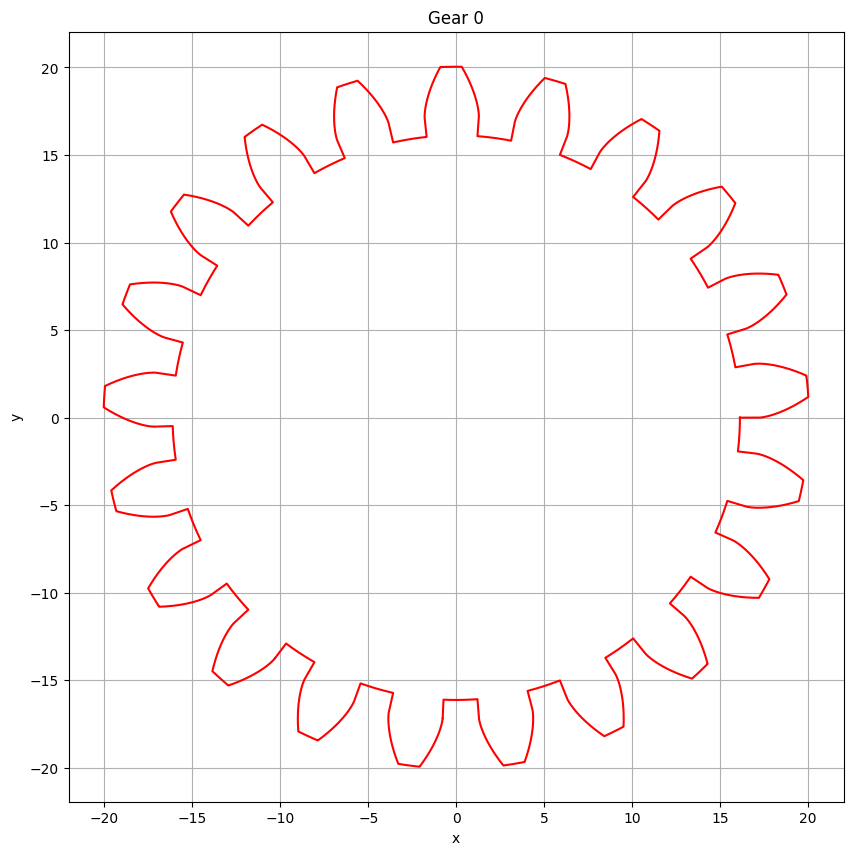

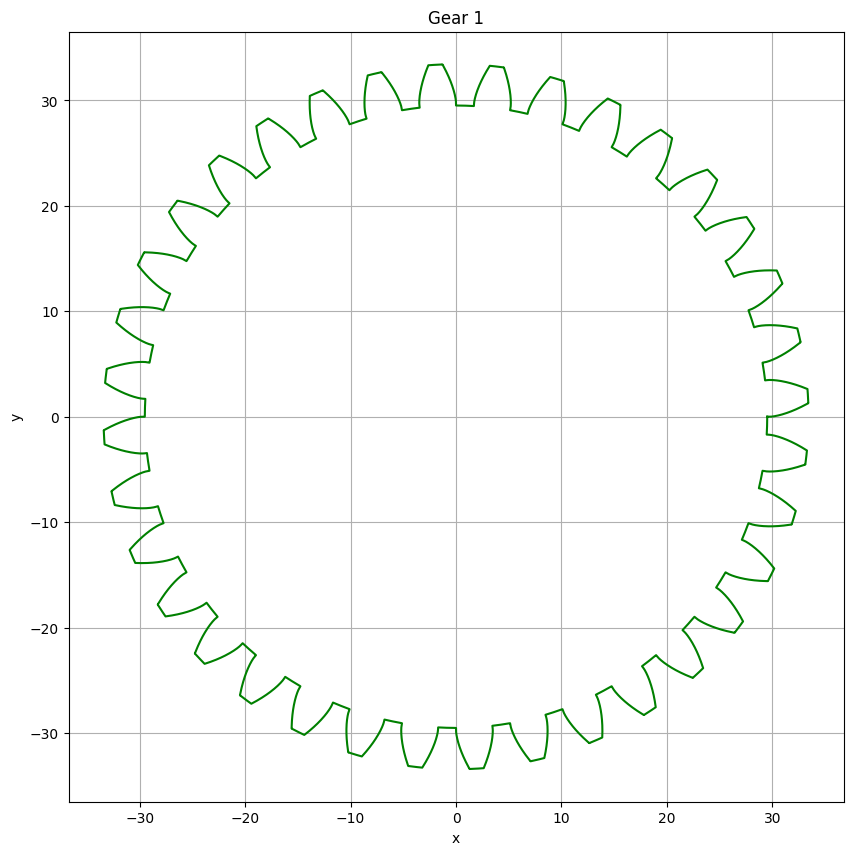

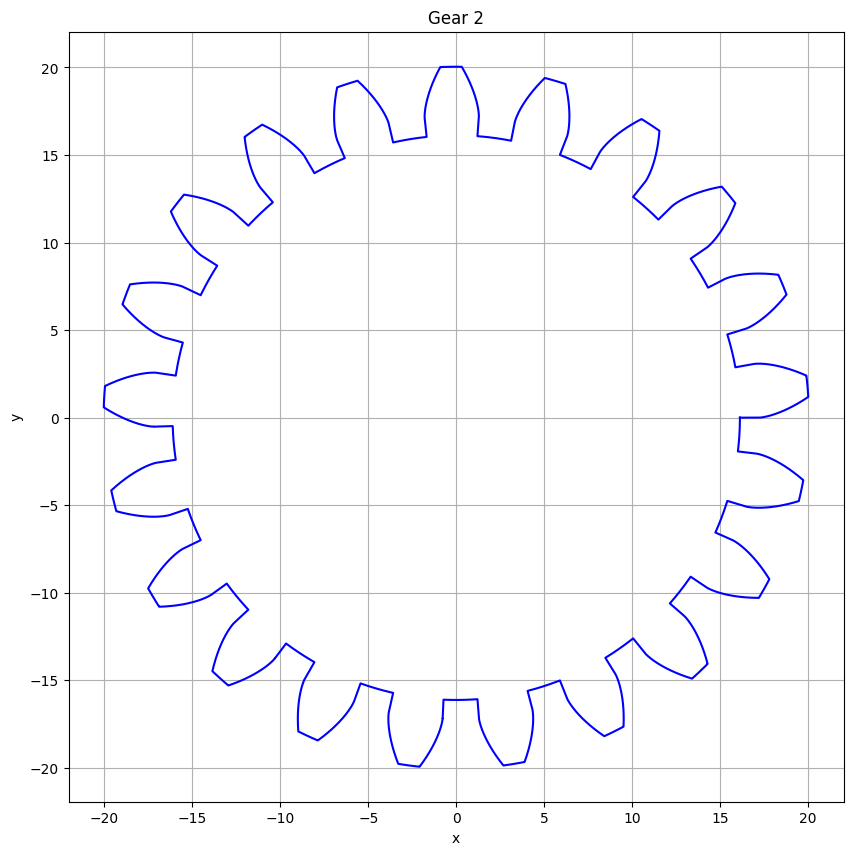

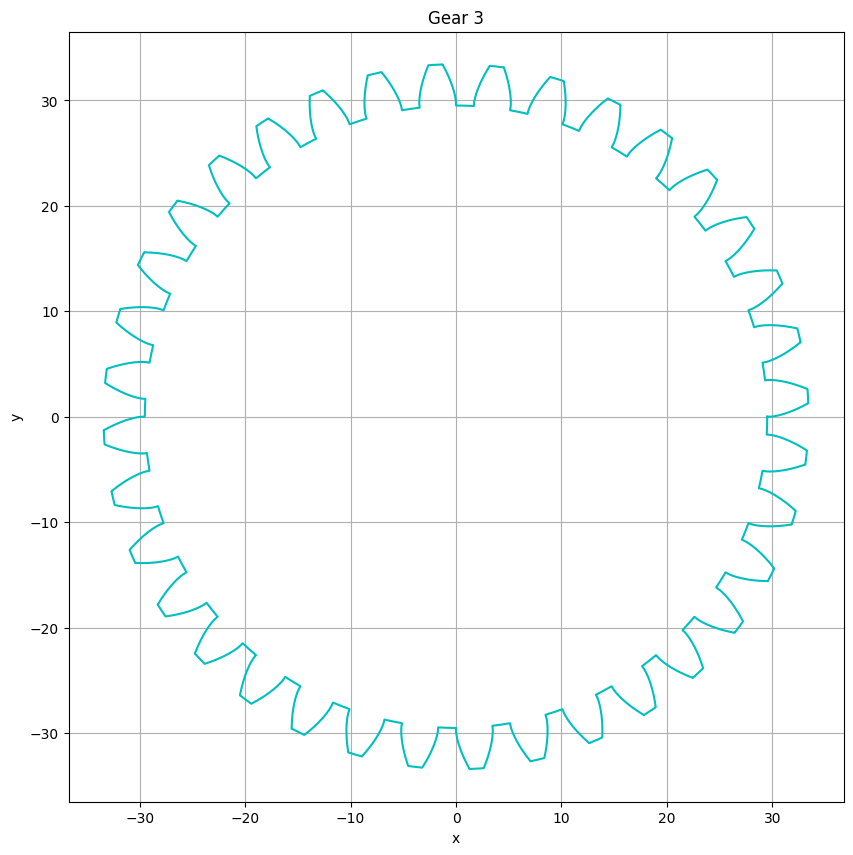

In [32]:
for gear in range(len(gears)):
    plot_gear(gear, gear_coord)

# Gears to .stp

In [33]:
def dict_to_tuples(coord_dict, key):

    x_values = np.concatenate([coord_dict[key]['x']])
    y_values = np.concatenate([coord_dict[key]['y']])

    return list(zip(x_values, y_values))

for gear in range(len(gears)):

  tuplas = dict_to_tuples(gear_coord, gear)

  tuplas = [(round(x, 4), round(y, 4)) for x, y in tuplas]

  tuplas_unicas = []
  vistas = set()

  for tupla in tuplas:
      if tupla not in vistas:
          tuplas_unicas.append(tupla)
          vistas.add(tupla)

  result = cq.Workplane("front").polyline(tuplas_unicas).close().extrude(round(gears[gear]['Face width'],2))

  #result = cq.Workplane("front").spline(tuplas_unicas).close().extrude(round(gears[gear]['Face width'],2))

  cq.exporters.export(result, "/content/gear"+str(gear)+".stp", "STEP")

  cq.exporters.export(result, "/content/gear"+str(gear)+".stl")

# References



1.   Norton, R. L. (2010). Machine Design: An Integrated Approach (4th ed). Prentice Hall.
2.   MatWeb. (n.d.). MatWeb Material Property Data. Retrieved from http://www.matweb.com
3.   ASM Handbook, Volume 19 - Fatigue and Fracture. ASM International Handbook Committee. ASM International. ISBN: 9781615031672. Available at: https://books.google.com.br/books/about/ASM_Handbook_Volume_19_Fatigue_and_Fract.html?id=FlwvygEACAAJ&redir_esc=y
4.   https://www.youtube.com/watch?v=uj7BnldaOSc
5.   Zou, Ting & Shaker, Mathew & Angeles, Jorge & Morozov, Alexei. (2014). Optimization of Tooth Root Profile of Spur Gears for Maximum Load-Carrying Capacity. 10.13140/2.1.4240.1286.
6.  American Gear
Manufacturers Association (AGMA)
